#### library

In [1]:
import importlib
import Training_utils
import torchvision
from torchvision import transforms
import tb_utils
importlib.reload(tb_utils)
from tb_utils import *
importlib.reload(Training_utils)
from Training_utils import *

current path: C:\Users\NormalKim\[0_BigData_Acu]\Acupuncture-Points\CV_DeepLearning


#### preprocessing

In [2]:
os.getcwd()

'C:\\Users\\NormalKim\\[0_BigData_Acu]\\Acupuncture-Points\\CV_DeepLearning'

In [13]:
os.listdir()

['sotack_info.json', 'taeyeon']

In [6]:
os.chdir('./Acu_Dataset/taeyeon')

In [17]:
os.listdir()

['change', 'org', 'taeyeon_info.json', 'taeyeon_processed.json']

In [18]:
# basic
json_file = './taeyeon_info.json'
HandDataSet(json_file, root)
with open(json_file) as f:
    json_data = json.load(f)
keys = list(json_data.keys())
kw = json_data[keys[0]][0]['acup_info']
keys_modified = [ keys[i].replace(kw, 'Hand') for i in range(len(keys)) ]

# change
os_dir = os.listdir('./change')
os_changed = [ os_dir[i][:-4] for i in range(len(os_dir)) ]
intersect_change = list(set(keys).intersection( set(os_changed)))

AssertionError: Observed file-tag mismatch!

In [ ]:
# org 
os_dir = os.listdir('./org')
os_org = [ os_dir[i][:-4] for i in range(len(os_dir)) ]
intersect_org = list(set(keys_modified).intersection( set(os_org)))

In [ ]:
leftover = list(set(intersect_org) ^ set(keys_modified))
leftover =  [ i.replace('Hand', kw) for i in leftover]

In [ ]:
os.getcwd()

In [ ]:
os.listdir()

In [ ]:
for i in leftover:
    del json_data[i]

In [23]:
len(json_data)

1183

In [ ]:
with open(kw + '_processed.json', 'w') as f:
    json.dump(json_data, f)

#### check preprocessed

In [5]:
os.listdir()

['.gitignore',
 '.ipynb_checkpoints',
 'Acu_Dataset',
 'color_mnist2',
 'create_new_mnist.ipynb',
 'dataset',
 'GAN_utils.py',
 'Hands.ipynb',
 'Hands_sobu',
 'Image_Process_utils.py',
 'lena.png',
 'mnist.csv',
 'mnist_eda.R',
 'model_utils.py',
 'Quick_Check_File_Tag.ipynb',
 'README.md',
 'tb_utils.py',
 'Test_Hand_Dataset.ipynb',
 'Toy_Model_Mnist_GAN.ipynb',
 'Toy_Model_Mnist_Regression.ipynb',
 'Training_utils.py',
 'validation_set_simul.R',
 '__pycache__',
 '뒤.jpg',
 '앞.jpg']

In [24]:
json_file = './taeyeon_processed.json'
with open(json_file) as f:
    json_data = json.load(f)

In [25]:
root = './org'
dataset = HandDataSet(json_file, root) # no error! 

In [22]:
json_data['taeyeon_0000101']

[{'acup_info': 'taeyeon', 'hand_pos': 'palmar_left', 'acup_size': '3'},
 {'acup_coord_x': 187, 'acup_coord_y': 624, 'acup_coord': [187, 624]}]

#### 데이터 전처리 추가 : 라벨링 일괄적으로 처리하긴 해야함

In [ ]:
# 추가해야함..

#### Data Loader

In [8]:
os.chdir('..')

In [10]:
os.chdir('..')

In [11]:
os.listdir()

['.gitignore',
 '.ipynb_checkpoints',
 'Acu_Dataset',
 'color_mnist2',
 'create_new_mnist.ipynb',
 'dataset',
 'GAN_utils.py',
 'Hands.ipynb',
 'Hands_sobu',
 'Image_Process_utils.py',
 'lena.png',
 'mnist.csv',
 'mnist_eda.R',
 'model_utils.py',
 'Quick_Check_File_Tag.ipynb',
 'README.md',
 'tb_utils.py',
 'Test_Hand_Dataset.ipynb',
 'Toy_Model_Mnist_GAN.ipynb',
 'Toy_Model_Mnist_Regression.ipynb',
 'Training_utils.py',
 'validation_set_simul.R',
 '__pycache__',
 '뒤.jpg',
 '앞.jpg']

In [3]:
os.getcwd() # 'C:\\Users\\NormalKim\\[0_BigData_Acu]\\Acupuncture-Points\\CV_DeepLearning'

'C:\\Users\\NormalKim\\[0_BigData_Acu]\\Acupuncture-Points\\CV_DeepLearning'

In [4]:
os.listdir('./Acu_Dataset/nogung')

['change', 'nogung_info.json', 'nogung_info_new.json', 'org']

In [5]:
# 데이터 불러오기 
# image_size = 224
# transforms.Resize(image_size),
batch_size =2
my_transforms = transforms.Compose([
    transforms.ToTensor()
    #transforms.Normalize((0.5,), (0.5,)),
    ])
img_dir = './Acu_Dataset/nogung/org'
json_file = './Acu_Dataset/nogung/nogung_info.json'
ty_dataset = HandDataSet(json_file, img_dir, train=True, transform = my_transforms)

In [6]:
# split test, train dataset
# 실제로는 테스트 셋을 따로 빼줘야함.. 
test_set_size = int(len(ty_dataset) * 0.1)
train_set_size = len(ty_dataset) - test_set_size
train_set, test_set = torch.utils.data.random_split(ty_dataset, [train_set_size, test_set_size])

In [8]:
iter(train_set).__next__()[0].shape

torch.Size([3, 700, 700])

In [9]:
train_loader = DataLoader(train_set, batch_size = 2, shuffle = True)
test_loader = DataLoader(test_set, batch_size = 2, shuffle = True)

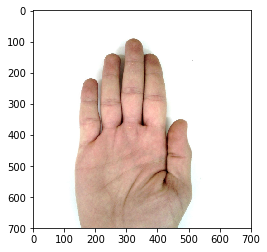

In [10]:
plt.imshow(np.transpose(iter(train_loader).__next__()[0][0], (1,2,0)))

In [ ]:
os.listdir()

#### 모델

In [11]:
from model_utils import *

In [12]:
model50 = MyResNet(block = BasicBlock, cfg = [3,4,6,3])
model50.forward(torch.randn(1,3,700,700))

(tensor([[-1.0822]], grad_fn=<AddmmBackward>),
 tensor([[-0.7065,  0.0663]], grad_fn=<AddmmBackward>))

In [13]:
summary(model50.to('cuda'), input_size = (3, 700, 700), device = 'cuda') # 21 M 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 350, 350]           9,408
       BatchNorm2d-2         [-1, 64, 350, 350]             128
              ReLU-3         [-1, 64, 350, 350]               0
         MaxPool2d-4         [-1, 64, 175, 175]               0
            Conv2d-5         [-1, 64, 175, 175]          36,864
       BatchNorm2d-6         [-1, 64, 175, 175]             128
              ReLU-7         [-1, 64, 175, 175]               0
            Conv2d-8         [-1, 64, 175, 175]          36,864
       BatchNorm2d-9         [-1, 64, 175, 175]             128
             ReLU-10         [-1, 64, 175, 175]               0
       BasicBlock-11         [-1, 64, 175, 175]               0
           Conv2d-12         [-1, 64, 175, 175]          36,864
      BatchNorm2d-13         [-1, 64, 175, 175]             128
             ReLU-14         [-1, 64, 1

          Linear-125                    [-1, 2]           1,026
Total params: 21,286,211
Trainable params: 21,286,211
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 5.61
Forward/backward pass size (MB): 945.16
Params size (MB): 81.20
Estimated Total Size (MB): 1031.97
----------------------------------------------------------------


In [14]:
from tb_utils import *

#### 훈련

In [1]:
targets

NameError: name 'targets' is not defined

In [15]:
model = model50

In [16]:
from torch.optim.lr_scheduler import StepLR
import time, datetime

In [17]:
# 1. Optimizer
learning_rate = 0.0001
momentum = 0.9 
num_epochs = 10

optimizer = torch.optim.Adam(model50.parameters(), lr = learning_rate, betas = (0.5, 0.999))

# 2. Criterion 
# cls_loss = nn.CrossEntropyLoss()
mse_loss = nn.MSELoss()
# smooth l1: nn.SmoothL1Loss()
# dropout 

#start_time = time.time()
history = []
#total_time = 0

# 3. For loop
dataloader = train_loader
scheduler = StepLR(optimizer, step_size = 2, gamma = 0.5)
print('start training')
start = time.time()
for epoch in range(num_epochs):
    epoch_start = time.time()
#    epoch_start = time.time()
   # print("Epoch: {}/{}".format(num_epochs+1, num_epochs))
    # set to train mode
    model.train()
    
    # loss
    train_loss = 0.0
    loss_monitor = []
    for batch_idx, (imgs, targets) in enumerate(dataloader):
       # imgs = imgs.to(torch.float32)
        targets = [ i.to(torch.float32).to('cuda') for i in targets]
        imgs = imgs.to('cuda')
   #     print('batch idx: ', batch_idx)
        optimizer.zero_grad()
        out1, out2 = model(imgs)
        
      #  loss_cls = cls_loss(out1, targets[0] )
        loss_x = mse_loss(out2[:,0], targets[0] )
        loss_y = mse_loss(out2[:,1], targets[1] )
        loss =  loss_x + loss_y
        
        # backpropagation 
        loss.backward()
        
        # update parameters
        optimizer.step()
        loss_monitor.append(loss.item())
        # compute total loss
       # train_loss += loss.item() * imgs.size(0)
       #  print('avg loss: ', loss.item())
        if batch_idx == 1:
                end = time.time() 
                time_per_batch = end - start
                time_per_epoch = time_per_batch * len(dataloader)
        
        if batch_idx % 5 == 0:
            print(f'Epoch [{epoch+1} / {num_epochs}] Batch {batch_idx}/{len(dataloader)} '
              f' Loss: {loss.item() :.3f} MAVLoss : {np.mean(loss_monitor):.3f}'
              f' || Current Time: {str(datetime.datetime.now().time())[:8]}'
              f' Time Left: {time_per_epoch*(num_epochs-epoch - batch_idx/len(dataloader))/60:.2f} min')
            with torch.no_grad():
                img_list = gen_train_monitor_plot(imgs, out2, x_ind = 0, y_ind = 1,target =  targets)
                imgs_grid = torchvision.utils.make_grid(img_list, normalize = True)
                writer = SummaryWriter(f'runs/hands')
                writer.add_image('imgs', imgs_grid)
                writer.flush()
        scheduler.step()

start training


NameError: name 'time_per_epoch' is not defined

In [ ]:
#model50 = model
#def trainer(learning_rate = 0.0001, momentum = 0.9, num_epochs = 10, lr_schedule = False)
# hyperparameters
# 1. Optimizer
learning_rate = 0.00001
momentum = 0.9 
num_epochs = 10
optimizer = torch.optim.Adam(model50.parameters(), lr = learning_rate, betas = (0.5, 0.999))

# 2. Criterion 
cls_loss = nn.CrossEntropyLoss()
mse_loss = nn.MSELoss()
# smooth l1: nn.SmoothL1Loss()
# dropout 

start_time = time.time()
history = []
total_time = 0

# 3. For loop
dataloader = train_loader

scheduler = StepLR(optimizer, step_size = 2, gamma = 0.5)
print('start training')
start = time.time()
for epoch in range(num_epochs):
    epoch_start = time.time()
   # print("Epoch: {}/{}".format(num_epochs+1, num_epochs))
    # set to train mode
    model50.train()
    
    #Timer
#    start = torch.cuda.Event(enable_timing=True)
#    end = torch.cuda.Event(enable_timing=True)
#    start.record()
    # loss

            
    train_loss = 0.0
    loss_monitor = []
    for batch_idx, (imgs, targets) in enumerate(dataloader):
       # imgs = imgs.to(torch.float32)
        targets = [ i.to(torch.float32).to('cuda') for i in targets]
        imgs = imgs.to('cuda')
        #targets = targets.to('cuda')

        optimizer.zero_grad()
        out1, out2 = model50(imgs)

      #  loss_cls = cls_loss(out1, targets[0] )
        loss_x = mse_loss(out2[:,0], targets[0] )
        loss_y = mse_loss(out2[:,1], targets[1] )
        loss =  loss_x + loss_y

        # backpropagation 
        loss.backward()

        # update parameters
        optimizer.step()

        # compute total loss
        #train_loss += loss.item() * imgs.size(0)
       #  print('avg loss: ', loss.item())
        loss_monitor.append(loss.item())
    
        if batch_idx == 1:
            end = time.time() 
            time_per_batch = end - start
            time_per_epoch = time_per_batch * len(dataloader)

        if (batch_idx % 10 == 0) & (batch_idx !=0):
            print(f'Epoch [{epoch+1} / {num_epochs}] Batch {batch_idx}/{len(dataloader)} '
                  f' Loss: {loss.item() :.3f} MAVLoss : {np.mean(loss_monitor):.3f}'
                  f' || Current Time: {str(datetime.datetime.now().time())[:8]}'
                  f' Time Left: {time_per_epoch*(num_epochs-epoch - batch_idx/len(dataloader))/60:.2f} min'
                 )
            #with torch.no_grad():
              #  end.record()                    
             #   img_list = gen_train_monitor_plot(imgs, out2,x_ind =0, y_ind = 1, target = targets)
             #   imgs_grid = torchvision.utils.make_grid(img_list, normalize = True)
             #   writer = SummaryWriter(f'{tb_kw}') #name of this 
             #   writer.add_image('imgs', imgs_grid) 
             #   writer.flush()
        # class accuracy
    scheduler.step()
        # pixel accuracy 
        
        
        # tensorboard : with loss, img 
        
        
        

In [51]:
test_data1 = iter(test_loader).__next__()[0]

In [53]:
model50.to('cpu')

MyResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)


In [49]:
test_data1.to('cuda')

tensor([[[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1

In [88]:
test_data1[:,:,:,:].dtype

torch.float32

In [ ]:
# torch.Size 2,3,700, 700
# torch.float32

In [89]:
test_data1

tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]],


        [[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
        

In [68]:
model50(test_data1)

RuntimeError: Expected 4-dimensional input for 4-dimensional weight 64 3 7 7, but got 3-dimensional input of size [3, 700, 700] instead

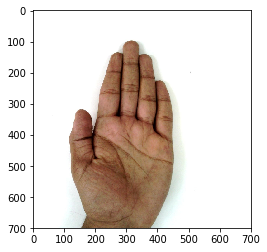

In [56]:
plt.imshow(np.transpose(test_data1[0], (1,2,0)))

In [57]:
os.getcwd()a

'C:\\Users\\NormalKim\\[0_BigData_Acu]\\Acupuncture-Points\\CV_DeepLearning'

In [115]:
imtest = plt.imread('./Acu_Dataset/hand_1jpg.jpg')

In [117]:
torch.float32(imtest)

TypeError: 'torch.dtype' object is not callable

In [100]:
torch.from_numpy(imtest/255.0).shape

torch.Size([700, 700, 3])

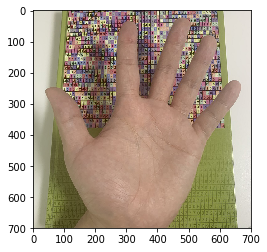

In [62]:
plt.imshow(imtest) # [339.5872, 448.5518]

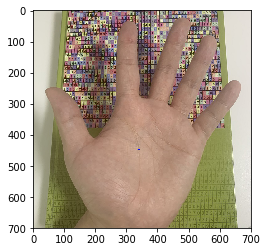

In [119]:
plt.imshow(create_circle_patch(imtest,339.5872,448.5518 )) #[339.5872, 448.5518]

In [116]:
imtest = imtest/255.0


array([[[0.86666667, 0.85882353, 0.81176471],
        [0.86666667, 0.85882353, 0.81176471],
        [0.86666667, 0.85882353, 0.81176471],
        ...,
        [0.89411765, 0.8745098 , 0.85098039],
        [0.89411765, 0.8745098 , 0.85098039],
        [0.89411765, 0.8745098 , 0.85098039]],

       [[0.8627451 , 0.85490196, 0.80784314],
        [0.86666667, 0.85882353, 0.81176471],
        [0.86666667, 0.85882353, 0.81176471],
        ...,
        [0.89411765, 0.8745098 , 0.85098039],
        [0.89411765, 0.8745098 , 0.85098039],
        [0.89411765, 0.8745098 , 0.85098039]],

       [[0.8627451 , 0.85490196, 0.80784314],
        [0.8627451 , 0.85490196, 0.80784314],
        [0.86666667, 0.85882353, 0.81176471],
        ...,
        [0.89411765, 0.8745098 , 0.85098039],
        [0.89411765, 0.8745098 , 0.85098039],
        [0.89411765, 0.8745098 , 0.85098039]],

       ...,

       [[0.81176471, 0.8       , 0.73333333],
        [0.80392157, 0.79215686, 0.7254902 ],
        [0.79607843, 0

In [103]:
my_transforms = transforms.Compose([
    transforms.ToTensor()
    #transforms.Normalize((0.5,), (0.5,)),
    ])

In [106]:
imtest = my_transforms(imtest)

In [110]:
imtest = imtest.unsqueeze(0)

In [111]:
model50(imtest)

(tensor([[-2.6242]], grad_fn=<AddmmBackward>),
 tensor([[339.5872, 448.5518]], grad_fn=<AddmmBackward>))

In [63]:
test_data1.shape

torch.Size([2, 3, 700, 700])

In [ ]:
import torchvision

#### 추후 활용

In [ ]:
import torch
from torchvision.datasets import MNIST
transform = transforms.Compose([transforms.ToTensor(), 
                                        transforms.Normalize((0.5,), (0.5,))])
dataset = MNIST(root = './data', train = train, transform = transform, download=True)
train_set, val_set = torch.utils.data.random_split(dataset, [50000, 10000])

In [ ]:
import torch
from torchvision.datasets import ImageFolder
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split
from torchvision.transforms import Compose, ToTensor, Resize
from torch.utils.data import DataLoader

def train_val_dataset(dataset, val_split=0.25):
    train_idx, val_idx = train_test_split(list(range(len(dataset))), test_size=val_split)
    datasets = {}
    datasets['train'] = Subset(dataset, train_idx)
    datasets['val'] = Subset(dataset, val_idx)
    return datasets

dataset = ImageFolder('C:\Datasets\lcms-dataset', transform=Compose([Resize((224,224)),ToTensor()]))
print(len(dataset))
datasets = train_val_dataset(dataset)
print(len(datasets['train']))
print(len(datasets['val']))
# The original dataset is available in the Subset class
print(datasets['train'].dataset)

dataloaders = {x:DataLoader(datasets[x],32, shuffle=True, num_workers=4) for x in ['train','val']}
x,y = next(iter(dataloaders['train']))